In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn.apionly as sns
from sklearn.model_selection import GridSearchCV

import comptools as comp

%matplotlib inline

/home/jbourbeau/.virtualenvs/composition/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Load simulation data and pipeline
df_sim_train, df_sim_test = comp.load_sim(config='IC86.2012')
feature_list, feature_labels = comp.analysis.get_training_features()
pipeline = comp.get_pipeline('BDT')

In [3]:
feature_list

['lap_cos_zenith',
 'log_s125',
 'log_dEdX',
 'log_d4r_peak_energy',
 'log_d4r_peak_sigma']

In [4]:
pipeline.get_params().keys()

['classifier__min_impurity_split',
 'classifier__max_features',
 'classifier__subsample',
 'classifier__max_depth',
 'classifier__min_samples_split',
 'classifier__learning_rate',
 'classifier__min_samples_leaf',
 'classifier__criterion',
 'classifier__loss',
 'classifier__n_estimators',
 'classifier__max_leaf_nodes',
 'steps',
 'classifier__warm_start',
 'classifier__verbose',
 'classifier__presort',
 'classifier__min_weight_fraction_leaf',
 'classifier',
 'classifier__random_state',
 'classifier__init']

In [5]:
parameters = {'classifier__max_depth': range(1, 11), 
              'classifier__n_estimators':[5, 10, 20, 50, 100, 200, 300, 400, 500, 600]}

# parameters = {'classifier__max_depth': range(1, 8), 
#               'classifier__n_estimators':[5, 10, 20, 50, 100, 200, 300, 400, 500, 600]}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=25, verbose=2)
grid_search.fit(df_sim_train[feature_list], df_sim_train['target'])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] classifier__n_estimators=5, classifier__max_depth=1 .............
[CV] classifier__n_estimators=5, classifier__max_depth=1 .............
[CV] classifier__n_estimators=5, classifier__max_depth=1 .............
[CV] classifier__n_estimators=10, classifier__max_depth=1 ............
[CV]  classifier__n_estimators=5, classifier__max_depth=1, total=   0.1s
[CV] classifier__n_estimators=10, classifier__max_depth=1 ............
[CV] classifier__n_estimators=10, classifier__max_depth=1 ............
[CV] classifier__n_estimators=20, classifier__max_depth=1 ............
[CV] classifier__n_estimators=20, classifier__max_depth=1 ............
[CV]  classifier__n_estimators=5, classifier__max_depth=1, total=   0.1s
[CV] classifier__n_estimators=20, classifier__max_depth=1 ............
[CV] classifier__n_estimators=50, classifier__max_depth=1 ............
[CV] classifier__n_estimators=50, classifier__max_depth=1 ............
[CV]  clas

[CV]  classifier__n_estimators=20, classifier__max_depth=3, total=   1.3s
[CV] classifier__n_estimators=300, classifier__max_depth=3 ...........
[CV]  classifier__n_estimators=400, classifier__max_depth=1, total=   9.5s
[CV] classifier__n_estimators=300, classifier__max_depth=3 ...........
[CV]  classifier__n_estimators=400, classifier__max_depth=1, total=   9.9s
[CV] classifier__n_estimators=400, classifier__max_depth=3 ...........
[CV]  classifier__n_estimators=400, classifier__max_depth=1, total=  10.0s
[CV]  classifier__n_estimators=200, classifier__max_depth=2, total=   7.8s
[CV] classifier__n_estimators=500, classifier__max_depth=3 ...........
[CV] classifier__n_estimators=500, classifier__max_depth=3 ...........
[CV]  classifier__n_estimators=200, classifier__max_depth=2, total=   7.5s
[CV] classifier__n_estimators=600, classifier__max_depth=3 ...........
[CV]  classifier__n_estimators=50, classifier__max_depth=3, total=   3.2s
[CV] classifier__n_estimators=50, classifier__max_d

[CV] classifier__n_estimators=400, classifier__max_depth=4 ...........
[CV]  classifier__n_estimators=20, classifier__max_depth=5, total=   2.6s
[CV] classifier__n_estimators=100, classifier__max_depth=5 ...........
[CV]  classifier__n_estimators=400, classifier__max_depth=3, total=  24.3s
[CV] classifier__n_estimators=400, classifier__max_depth=3 ...........
[CV]  classifier__n_estimators=200, classifier__max_depth=4, total=  14.9s
[CV] classifier__n_estimators=100, classifier__max_depth=5 ...........
[CV]  classifier__n_estimators=50, classifier__max_depth=5, total=   4.4s
[CV] classifier__n_estimators=100, classifier__max_depth=5 ...........
[CV]  classifier__n_estimators=50, classifier__max_depth=5, total=   4.0s
[CV] classifier__n_estimators=200, classifier__max_depth=5 ...........
[CV]  classifier__n_estimators=200, classifier__max_depth=4, total=   9.0s
[CV] classifier__n_estimators=200, classifier__max_depth=5 ...........
[CV]  classifier__n_estimators=400, classifier__max_dept

[Parallel(n_jobs=25)]: Done 139 tasks      | elapsed:  1.1min


[CV]  classifier__n_estimators=500, classifier__max_depth=3, total=  23.0s
[CV] classifier__n_estimators=300, classifier__max_depth=6 ...........
[CV]  classifier__n_estimators=50, classifier__max_depth=6, total=   5.2s
[CV] classifier__n_estimators=300, classifier__max_depth=6 ...........
[CV]  classifier__n_estimators=50, classifier__max_depth=6, total=   5.2s
[CV] classifier__n_estimators=400, classifier__max_depth=6 ...........
[CV]  classifier__n_estimators=400, classifier__max_depth=4, total=  31.0s
[CV] classifier__n_estimators=400, classifier__max_depth=6 ...........
[CV]  classifier__n_estimators=50, classifier__max_depth=6, total=   7.4s
[CV] classifier__n_estimators=400, classifier__max_depth=6 ...........
[CV]  classifier__n_estimators=600, classifier__max_depth=3, total=  27.9s
[CV] classifier__n_estimators=500, classifier__max_depth=6 ...........
[CV]  classifier__n_estimators=100, classifier__max_depth=6, total=  12.1s
[CV] classifier__n_estimators=500, classifier__max_d

[CV] classifier__n_estimators=200, classifier__max_depth=8 ...........
[CV]  classifier__n_estimators=50, classifier__max_depth=8, total=  10.8s
[CV] classifier__n_estimators=200, classifier__max_depth=8 ...........
[CV]  classifier__n_estimators=50, classifier__max_depth=8, total=  10.6s
[CV] classifier__n_estimators=200, classifier__max_depth=8 ...........
[CV]  classifier__n_estimators=50, classifier__max_depth=8, total=  14.5s
[CV] classifier__n_estimators=300, classifier__max_depth=8 ...........
[CV]  classifier__n_estimators=200, classifier__max_depth=7, total= 1.4min
[CV] classifier__n_estimators=300, classifier__max_depth=8 ...........
[CV]  classifier__n_estimators=100, classifier__max_depth=8, total=  23.2s
[CV] classifier__n_estimators=300, classifier__max_depth=8 ...........
[CV]  classifier__n_estimators=500, classifier__max_depth=6, total= 2.3min
[CV] classifier__n_estimators=400, classifier__max_depth=8 ...........
[CV]  classifier__n_estimators=300, classifier__max_dept

[CV]  classifier__n_estimators=600, classifier__max_depth=8, total= 1.8min
[CV] classifier__n_estimators=100, classifier__max_depth=10 ..........
[CV]  classifier__n_estimators=10, classifier__max_depth=10, total=  19.5s
[CV] classifier__n_estimators=100, classifier__max_depth=10 ..........
[CV]  classifier__n_estimators=500, classifier__max_depth=8, total= 2.1min
[CV] classifier__n_estimators=100, classifier__max_depth=10 ..........
[CV]  classifier__n_estimators=600, classifier__max_depth=8, total= 1.9min
[CV] classifier__n_estimators=200, classifier__max_depth=10 ..........
[CV]  classifier__n_estimators=20, classifier__max_depth=10, total=  17.1s
[CV] classifier__n_estimators=200, classifier__max_depth=10 ..........
[CV]  classifier__n_estimators=20, classifier__max_depth=10, total=  22.8s
[CV] classifier__n_estimators=200, classifier__max_depth=10 ..........
[CV]  classifier__n_estimators=500, classifier__max_depth=8, total= 2.0min
[CV] classifier__n_estimators=300, classifier__ma

[Parallel(n_jobs=25)]: Done 300 out of 300 | elapsed:  8.8min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('classifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=2,
              subsample=1.0, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=25,
       param_grid={'classifier__n_estimators': [5, 10, 20, 50, 100, 200, 300, 400, 500, 600], 'classifier__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [20]:
grid_search.best_params_

{'classifier__max_depth': 5, 'classifier__n_estimators': 100}

In [6]:
cv_results = pd.DataFrame(grid_search.cv_results_)

In [7]:
cv_results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_classifier__max_depth,param_classifier__n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.124350,0.003587,0.624893,0.625878,1,5,"{u'classifier__n_estimators': 5, u'classifier_...",99,0.626134,0.627407,0.620045,0.626541,0.628500,0.623687,0.003914,0.000559,0.003561,0.001589
1,0.199901,0.005151,0.624873,0.626813,1,10,"{u'classifier__n_estimators': 10, u'classifier...",100,0.624164,0.626302,0.621299,0.628959,0.629156,0.625179,0.040196,0.000582,0.003247,0.001585
2,0.515962,0.007888,0.631420,0.634225,1,20,"{u'classifier__n_estimators': 20, u'classifier...",98,0.631507,0.633585,0.627806,0.635406,0.634947,0.633686,0.046533,0.000130,0.002916,0.000836
3,1.510248,0.014570,0.659337,0.662034,1,50,"{u'classifier__n_estimators': 50, u'classifier...",96,0.659682,0.662568,0.655802,0.659822,0.662528,0.663712,0.137765,0.000598,0.002756,0.001632
4,2.579062,0.019430,0.712924,0.716048,1,100,"{u'classifier__n_estimators': 100, u'classifie...",94,0.716452,0.721846,0.714721,0.717488,0.707600,0.708811,0.231105,0.003755,0.003831,0.005418
5,4.828316,0.045182,0.736922,0.742473,1,200,"{u'classifier__n_estimators': 200, u'classifie...",89,0.734300,0.741665,0.735852,0.743277,0.740613,0.742479,0.522091,0.018151,0.002686,0.000658
6,7.708707,0.057503,0.744165,0.748692,1,300,"{u'classifier__n_estimators': 300, u'classifie...",84,0.742180,0.747903,0.742359,0.748679,0.747955,0.749493,0.418122,0.000038,0.002681,0.000649
7,9.728296,0.072701,0.746572,0.752144,1,400,"{u'classifier__n_estimators': 400, u'classifie...",79,0.746060,0.750828,0.743971,0.753336,0.749687,0.752268,0.195547,0.006477,0.002361,0.001027
8,12.004228,0.083074,0.748403,0.753408,1,500,"{u'classifier__n_estimators': 500, u'classifie...",71,0.747970,0.752410,0.745463,0.755007,0.751776,0.752806,1.205721,0.011171,0.002595,0.001142
9,15.092670,0.097635,0.748682,0.753636,1,600,"{u'classifier__n_estimators': 600, u'classifie...",68,0.748687,0.752679,0.745642,0.755097,0.751716,0.753134,1.912546,0.004584,0.002480,0.001049


In [8]:
pivot_test_score = cv_results.pivot("param_classifier__max_depth", "param_classifier__n_estimators", "mean_test_score")
pivot_test_score

param_classifier__n_estimators,5,10,20,50,100,200,300,400,500,600
param_classifier__max_depth,,,,,,,,,,
1,0.624893,0.624873,0.631420,0.659337,0.712924,0.736922,0.744165,0.746572,0.748403,0.748682
2,0.648314,0.661526,0.722376,0.745319,0.750811,0.752542,0.753119,0.753318,0.754512,0.754214
3,0.713422,0.721520,0.743608,0.750572,0.753696,0.754631,0.754631,0.754353,0.754651,0.754870
4,0.729917,0.741061,0.749637,0.752781,0.754870,0.755746,0.755487,0.755049,0.753915,0.753975
5,0.738673,0.746373,0.750154,0.754651,0.755865,0.755208,0.754810,0.754393,0.753577,0.753219
6,0.745458,0.750095,0.753437,0.755228,0.755666,0.755547,0.754074,0.753000,0.752144,0.750672
7,0.748363,0.752841,0.754114,0.754412,0.755348,0.754333,0.752900,0.751249,0.750731,0.749557
8,0.747468,0.751507,0.754054,0.755407,0.754910,0.753398,0.752821,0.752005,0.750413,0.747786
9,0.747388,0.751050,0.754054,0.753975,0.753477,0.752025,0.750890,0.750114,0.748602,0.747866


/home/jbourbeau/.virtualenvs/composition/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


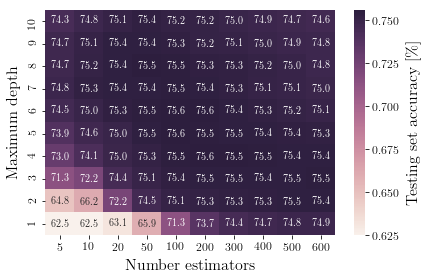

In [9]:
# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots()
sns.heatmap(pivot_test_score, annot=True, fmt='0.1%', ax=ax,
            cbar_kws={"label": "Testing set accuracy [\%]"}, robust=False, square=False)

# for _, spine in ax.spines.items():
#     spine.set_visible(True)
    
ax.set_xlabel('Number estimators')
ax.set_ylabel('Maximum depth')
ax.invert_yaxis()

outfile = os.path.join(comp.paths.figures_dir, 'model_evaluation',
                       'grid-search-max_depth-n_estimators-heatmap.png')
# plt.savefig(outfile)
plt.show()

In [10]:
pivot_train_score = cv_results.pivot("param_classifier__max_depth", "param_classifier__n_estimators", "mean_train_score")
pivot_train_score

param_classifier__n_estimators,5,10,20,50,100,200,300,400,500,600
param_classifier__max_depth,,,,,,,,,,
1,0.625878,0.626813,0.634225,0.662034,0.716048,0.742473,0.748692,0.752144,0.753408,0.753636
2,0.652134,0.664352,0.726067,0.750244,0.756144,0.759725,0.761377,0.762601,0.763815,0.765138
3,0.718307,0.725301,0.748552,0.758313,0.762163,0.766292,0.769884,0.772719,0.775296,0.778390
4,0.737210,0.748373,0.756999,0.762999,0.767446,0.774580,0.780470,0.785633,0.790727,0.795543
5,0.747826,0.756004,0.761228,0.769316,0.775316,0.785912,0.794946,0.803631,0.812257,0.821033
6,0.757556,0.764143,0.770481,0.778609,0.787305,0.801562,0.814765,0.827082,0.840593,0.852184
7,0.766620,0.773028,0.779435,0.790240,0.800786,0.821640,0.840742,0.858601,0.875734,0.890399
8,0.778738,0.785584,0.793483,0.806935,0.822326,0.847140,0.871764,0.893573,0.913979,0.928913
9,0.794200,0.804238,0.814416,0.831111,0.848851,0.880559,0.907711,0.931241,0.948174,0.962989


In [11]:
overfitting_pivot = (pivot_train_score - pivot_test_score)/pivot_test_score * 100
overfitting_pivot

param_classifier__n_estimators,5,10,20,50,100,200,300,400,500,600
param_classifier__max_depth,,,,,,,,,,
1,0.157627,0.310482,0.444347,0.408931,0.438215,0.753362,0.608320,0.746288,0.668688,0.661795
2,0.589295,0.427135,0.510969,0.660776,0.710274,0.954548,1.096493,1.232237,1.232925,1.448434
3,0.684730,0.523991,0.664971,1.031284,1.123374,1.545195,2.021149,2.434715,2.735663,3.115774
4,0.999132,0.986790,0.982137,1.357353,1.665964,2.492101,3.306819,4.050600,4.882813,5.513182
5,1.239164,1.290356,1.476166,1.943308,2.573316,4.065555,5.317269,6.526957,7.786961,9.003252
6,1.622932,1.872879,2.262045,3.095854,4.186856,6.090335,8.048344,9.838276,11.759570,13.522864
7,2.439575,2.681450,3.357696,4.749029,6.015542,8.922683,11.667150,14.289877,16.650764,18.789986
8,4.183528,4.534383,5.228923,6.821117,8.930362,12.442556,15.799701,18.825415,21.796779,24.221662
9,6.263314,7.081922,8.005016,10.230665,12.657794,17.091787,20.884565,24.146483,26.659312,28.764899


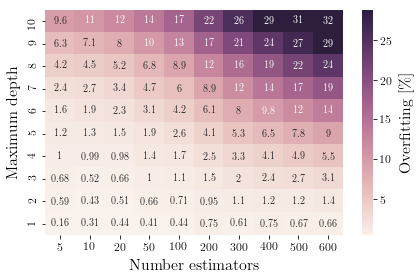

In [12]:
# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots()
sns.heatmap(overfitting_pivot, annot=True, ax=ax,
            cbar_kws={"label": "Overfitting [\%]"}, robust=True, square=False)

# for _, spine in ax.spines.items():
#     spine.set_visible(True)
    
ax.set_xlabel('Number estimators')
ax.set_ylabel('Maximum depth')
ax.invert_yaxis()

outfile = os.path.join(comp.paths.figures_dir, 'model_evaluation',
                       'grid-search-max_depth-n_estimators-heatmap-overfitting.png')
# plt.savefig(outfile)
plt.show()

In [13]:
pivot_test_std = cv_results.pivot("param_classifier__max_depth", "param_classifier__n_estimators", "std_test_score")
pivot_test_std

param_classifier__n_estimators,5,10,20,50,100,200,300,400,500,600
param_classifier__max_depth,,,,,,,,,,
1,0.003561,0.003247,0.002916,0.002756,0.003831,0.002686,0.002681,0.002361,0.002595,0.002480
2,0.007107,0.002362,0.005795,0.002730,0.001922,0.001684,0.001767,0.001702,0.001507,0.001878
3,0.008316,0.003727,0.001892,0.000430,0.001239,0.002053,0.002016,0.001769,0.000931,0.001686
4,0.004255,0.002422,0.001742,0.000617,0.000561,0.000834,0.001202,0.000935,0.001029,0.000985
5,0.001709,0.003150,0.002410,0.001267,0.001345,0.001087,0.000697,0.000441,0.000718,0.001189
6,0.002992,0.001697,0.001193,0.000525,0.000975,0.001170,0.000786,0.001299,0.001325,0.001517
7,0.002151,0.001317,0.000868,0.001170,0.001669,0.001299,0.001845,0.001498,0.002226,0.001724
8,0.001630,0.001121,0.000346,0.000715,0.001176,0.002146,0.002444,0.002833,0.003134,0.003889
9,0.001605,0.001454,0.001166,0.001599,0.001307,0.002423,0.002145,0.002559,0.002260,0.002887


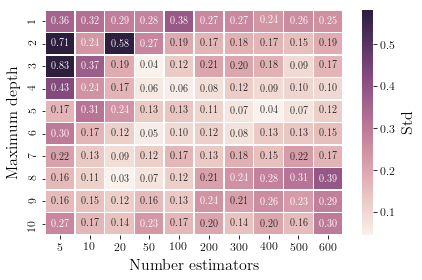

In [19]:
# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots()
sns.heatmap(pivot_test_std*100, annot=True, fmt='0.2f', linewidths=.5, ax=ax,
            cbar_kws={"label": "Std"}, robust=True, square=False)
ax.set_xlabel('Number estimators')
ax.set_ylabel('Maximum depth')
plt.show()

In [15]:
pivot_test_rank = cv_results.pivot("param_classifier__max_depth", "param_classifier__n_estimators", "rank_test_score")
pivot_test_rank

param_classifier__n_estimators,5,10,20,50,100,200,300,400,500,600
param_classifier__max_depth,,,,,,,,,,
1,99,100,98,96,94,89,84,79,71,68
2,97,95,91,83,56,46,40,38,19,24
3,93,92,85,60,32,17,17,22,15,12
4,90,87,66,45,12,2,5,10,31,29
5,88,80,62,15,1,9,14,21,33,39
6,82,64,36,8,3,4,26,41,48,59
7,72,43,25,20,7,23,42,53,58,67
8,76,52,27,6,11,37,44,50,61,75
9,77,54,27,29,35,49,55,63,70,73


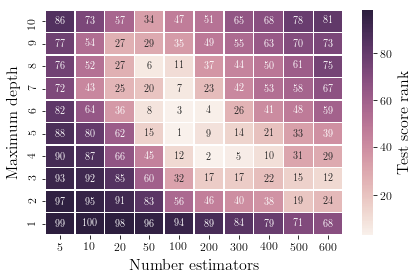

In [16]:
# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots()
sns.heatmap(pivot_test_rank, annot=True, fmt='d', linewidths=.5, ax=ax,
            cbar_kws={"label": "Test score rank"}, robust=True, square=False)
ax.set_xlabel('Number estimators')
ax.set_ylabel('Maximum depth')
ax.invert_yaxis()

outfile = os.path.join(comp.paths.figures_dir, 'model_evaluation',
                       'grid-search-max_depth-n_estimators-heatmap-test-rank.png')
# plt.savefig(outfile)
plt.show()

In [16]:
pivot_fit_time = cv_results.pivot("param_classifier__max_depth", "param_classifier__n_estimators", "mean_fit_time")
pivot_fit_time

param_classifier__n_estimators,5,10,20,50,100,200,300,400,500,600
param_classifier__max_depth,,,,,,,,,,
1,0.118298,0.209823,0.424922,1.067445,2.326791,3.973685,5.449798,6.460932,8.501271,11.071048
2,0.226728,0.394157,0.777675,1.811893,3.038147,6.127894,8.540042,11.151531,13.852913,16.218600
3,0.209464,0.420541,0.861163,2.001204,3.800102,8.846494,12.297432,14.067836,19.236447,24.484771
4,0.336374,0.604984,1.235185,3.104119,5.119169,9.678869,15.730774,18.360161,23.640411,27.256437
5,0.404802,0.706598,1.183219,3.298988,6.213872,11.399018,17.786696,24.940043,54.227860,59.289663
6,0.491018,1.063702,1.855955,4.426094,8.132892,16.700048,20.557351,67.781456,83.113592,91.269366
7,0.698670,1.219647,2.862616,11.854092,34.097424,12.419558,19.483242,24.667472,71.512716,36.189908
8,4.632594,1.209142,2.245910,4.815686,32.550906,51.969422,22.415552,31.409309,46.906632,71.876275
9,0.840302,1.667498,3.427363,8.029299,15.329603,32.917098,50.195497,85.439795,96.674725,113.502156


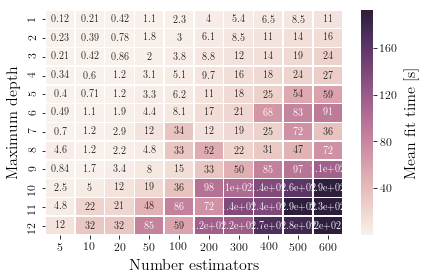

In [19]:
# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots()
sns.heatmap(pivot_fit_time, annot=True, linewidths=.5, ax=ax,
            cbar_kws={"label": "Mean fit time [s]"}, robust=True, square=False)
ax.set_xlabel('Number estimators')
ax.set_ylabel('Maximum depth')
plt.show()